# Kickstarter Projects is a platform where Entrepreneurs can post their projects or business ideas and try and get funded from other people.


Recommended Analysis

    1.Which category has the highest success percentage? How many projects have been successful?

    2.What project with a goal over $1,000 USD, had the biggest Goal Completion % (Pledged / Goal)? How much money was pledged?

    3.Can we identify any trends in project success rates over the years?

    4.As an investor, what types of projects should you be looking at to guarantee future success?

We'll try to find the answers for the above questions and more with the help of Python libraries like Pandas and Matplotlib and few of the questions will require external Business Intelligence software like Power BI. 

### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing required Packages to get data from Google Drive

In [2]:
# !pip install -U -q PyDrive

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials


# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# link = 'https://drive.google.com/file/d/1vrG0yPux2F-s7WbZWiajqKwosmp5_dyT/view?usp=sharing'


# # to get the id part of the file
# id = link.split("/")[-2]

# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('kickstarter_projects.csv')
# #Parsing the date columns at the inital stage itself
# df = pd.read_csv('kickstarter_projects.csv',parse_dates=['Deadline','Launched'])

In [2]:
df = pd.read_csv('kickstarter_projects.csv',parse_dates=['Deadline','Launched'])

In [3]:
#Checking what kind of data it is
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


### We'll start with Exploratory Data Analysis (EDA) to know the data and become one with it.

In [4]:
#Checking null values
df.isna().sum()

ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

In [5]:
#Checking shape of the dataframe
df.shape

(374853, 11)

In [6]:
# Whether binary or multiclass classification prediction
df['State'].value_counts()

Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: State, dtype: int64

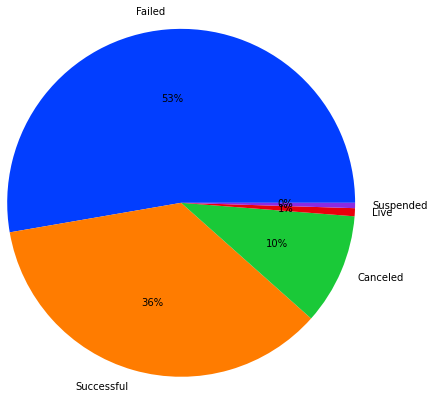

In [7]:
#pie chart
# declaring data
data = df['State'].value_counts()
keys = df['State'].value_counts().keys().unique()
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%',radius=2)
  
# displaying chart
plt.show()


#### Above Pie chart reveals that majority of Kickstarter Projects were a failure which makes sense as majority of such projects tend to fail due to multiple reasons. Success rate is less then 35 percent

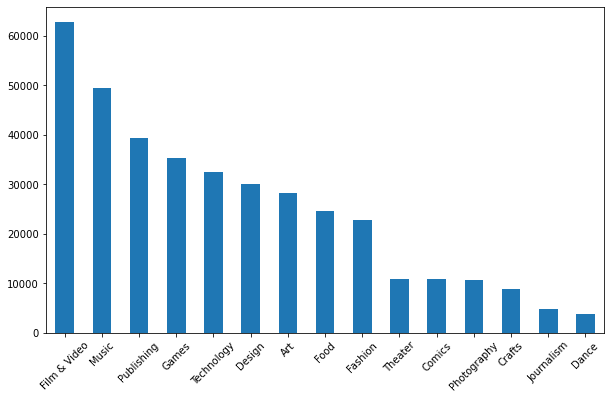

In [8]:
df['Category'].value_counts().plot(figsize=(10,6),kind='bar')
plt.xticks(rotation=45);

### Above Bar Graph tells us that Films & Video, Music, Publishing, Games are top Projects which tend to get more funding then other category 

In [9]:
#Describing the data
df.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


In [10]:
#Let's check what datatype each column has
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  int64         
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 31.5+ MB


### There are many columns which has object datatype which needs to be converted to category datatype which we'll handle soon.

In [11]:
#Doing a crosstab between Category and State
pd.crosstab(df['Category'],df['State'])

State,Canceled,Failed,Live,Successful,Suspended
Category,,,,,
Art,2221,14130,194,11510,96
Comics,842,4036,76,5842,23
Crafts,843,5703,76,2115,72
Dance,163,1235,18,2338,13
Design,4151,14814,305,10549,246
Fashion,2650,14181,250,5593,138
Film & Video,5742,32891,332,23612,117
Food,2209,15969,183,6085,153
Games,6199,16002,287,12518,219


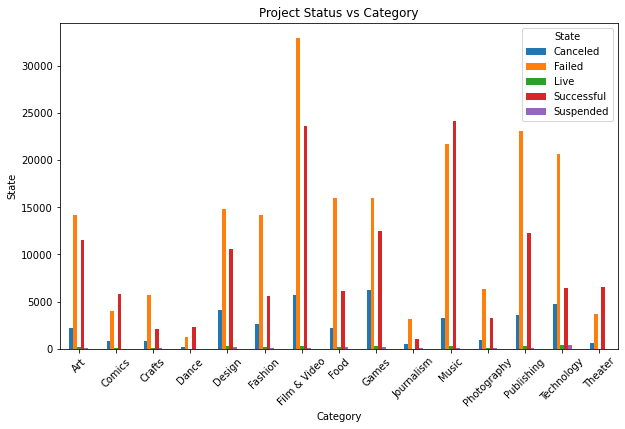

In [12]:
#Plotting a bar graph for the above crosstab 
fig, ax = plt.subplots(figsize=(10,6))
pd.crosstab(df['Category'],df['State'],rownames=['Categories']).plot(kind='bar',ax=ax)
ax.set(title="Project Status vs Category",xlabel='Category',ylabel='State')
plt.xticks(rotation=45);

### Above graph tells us that Category Films & Video get good funding yet there is always an uncertainly if it will fail or succeed as the graph states that fail to success ratio is 60:40 where as Music Category has 50-50 changes of make or break. 

In [14]:
#Let's check countries unique values
df['Country'].value_counts().keys().unique()

Index(['United States', 'United Kingdom', 'Canada', 'Australia', 'Germany',
       'France', 'Italy', 'Netherlands ', 'Spain', 'Sweden', 'Mexico',
       'New Zealand', 'Denmark', 'Ireland', 'Switzerland', 'Norway',
       'Hong Kong', 'Belgium', 'Austria', 'Singapore', 'Luxembourg', 'Japan'],
      dtype='object')

In [15]:
# Let's check what each country values are
df['Country'].value_counts()

United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Mexico              1752
New Zealand         1447
Denmark             1113
Ireland              811
Switzerland          760
Norway               708
Hong Kong            618
Belgium              617
Austria              597
Singapore            555
Luxembourg            62
Japan                 40
Name: Country, dtype: int64

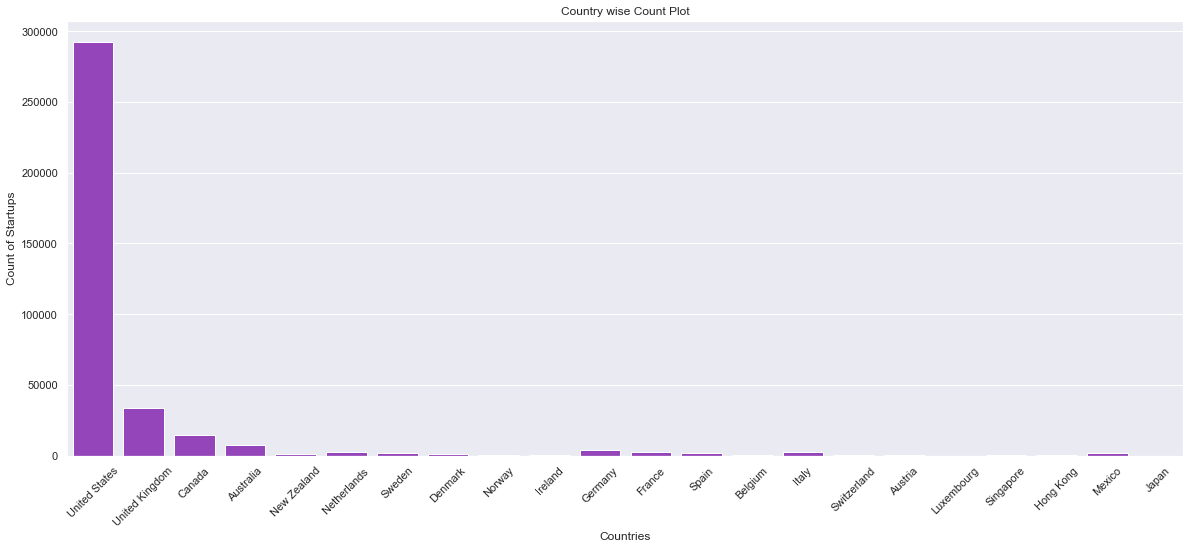

In [16]:
#Let's plot a count plot for our Country column
sns.set(rc = {'figure.figsize':(20,8)})
sns.countplot(x="Country",data=df,color='darkorchid')
plt.title("Country wise Count Plot");
plt.xlabel("Countries");
plt.ylabel("Count of Startups");
plt.xticks(rotation=45);

### From the above bar graph, we can say the top KickStarter Projects producing countries are:

  1. United States
  2. United Kingdom
  3. Canada
  4. Australia
  5.Germany

In [17]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


###We we find the amount given to the Projects(Pledged) and Project Requirement(Goal) %

In [18]:
df['GoalCompletionPercent'] = df['Pledged']/df['Goal']

In [19]:
df['GoalCompletionPercent'] = df['GoalCompletionPercent'].fillna(0)
df['GoalCompletionPercent'].astype('int', errors='ignore')

0         0.625000
1         0.000275
2         1.750000
3         1.464646
4         0.203684
            ...   
374848    0.000000
374849    0.017933
374850    0.016500
374851    0.010769
374852    0.184683
Name: GoalCompletionPercent, Length: 374853, dtype: float64

In [20]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,GoalCompletionPercent
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,0.625000
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,0.000275
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,1.750000
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,1.464646
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,0.203684


In [21]:
dfg = df.loc[(df['Goal']>1000)]
dfg.sample(15)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,GoalCompletionPercent
300416,902659872,"Pokie Pack! A ""stylish"" solution to a very dra...",Design,Product Design,United States,2016-07-26 16:52:29,2016-08-03,12686,360,11,Failed,0.028378
373726,458555343,"Creating a coffee revolution, a coffee virtual...",Technology,Technology,United Kingdom,2017-12-16 00:39:32,2018-01-15,13640,0,0,Canceled,0.000000
244333,2121735870,Restoration of the Canticle of Brother Sun and...,Art,Painting,Italy,2015-08-28 12:37:19,2015-09-30,3906,11,1,Failed,0.002816
274966,612766880,NDWK The North Dakota Wine Kitchen,Food,Small Batch,United States,2016-02-23 15:27:36,2016-03-24,23000,23530,124,Successful,1.023043
24415,1372488133,Blood Makes the Green Grass Grow – finishing f...,Film & Video,Narrative Film,United States,2011-07-06 00:31:24,2011-08-20,11000,11449,81,Successful,1.040818
267064,174729105,Snausages- a short film about love for a dog,Film & Video,Shorts,United States,2016-01-08 03:40:14,2016-01-30,1210,1220,25,Successful,1.008264
102140,1452732909,FLASH.IT: Light the Way at Burning Man 2013,Art,Public Art,United States,2013-07-03 18:03:15,2013-08-03,9000,9235,160,Successful,1.026111
23130,1542261853,Absolution (Canceled),Film & Video,Webseries,United States,2011-06-17 23:37:25,2011-08-16,10000,432,6,Canceled,0.043200
162222,1198213686,Get Off My Lawn Music Video,Film & Video,Music Videos,Australia,2014-08-06 13:56:31,2014-09-05,4683,5,1,Failed,0.001068
289500,1255080779,Don't We All Love HORROR Stories ... (Canceled),Publishing,Fiction,Germany,2016-05-17 02:56:33,2016-05-31,5577,0,0,Canceled,0.000000


In [22]:
dfg.groupby(['Category'])['GoalCompletionPercent'].aggregate('count').reset_index().sort_values('GoalCompletionPercent', ascending=False)
#aggregate can be changed to max, min, sum

,Category,GoalCompletionPercent
6,Film & Video,54144
10,Music,40593
12,Publishing,32826
13,Technology,30316
8,Games,30102
4,Design,27052
7,Food,21498
0,Art,19884
5,Fashion,18976
14,Theater,8852


###We can state that Project which were funded above $1000 that have high success rate are Film & Video, Music and Publishing

###ID and Name columns do not any value to the dataset and moreover our classification may find unwanted patterns which could affect the accuracy. Let's Drop them

In [23]:
df.drop('Name', axis=1, inplace=True)
df.drop('ID', axis=1, inplace=True)

In [24]:
#Let's check which all columns have object type
string_columns = []
for column,content in df.items():
    if pd.api.types.is_string_dtype(content):
        string_columns.append(column)
print(string_columns)

['Category', 'Subcategory', 'Country', 'State']


In [25]:
#Let's convert all above columns into categorical
for column,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[column]= content.astype('category')

In [26]:
#Now we have converted object to category datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Category               374853 non-null  category      
 1   Subcategory            374853 non-null  category      
 2   Country                374853 non-null  category      
 3   Launched               374853 non-null  datetime64[ns]
 4   Deadline               374853 non-null  datetime64[ns]
 5   Goal                   374853 non-null  int64         
 6   Pledged                374853 non-null  int64         
 7   Backers                374853 non-null  int64         
 8   State                  374853 non-null  category      
 9   GoalCompletionPercent  374853 non-null  float64       
dtypes: category(4), datetime64[ns](2), float64(1), int64(3)
memory usage: 19.0 MB


In [27]:
df.sample(10)

,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,GoalCompletionPercent
6940,Film & Video,Documentary,United States,2010-08-26 02:15:43,2010-10-01,2100,2200,65,Successful,1.047619
168910,Technology,Software,United States,2014-09-04 18:54:07,2014-10-04,1500,0,0,Failed,0.000000
225449,Technology,Gadgets,Germany,2015-05-26 08:02:22,2015-06-24,156828,20538,132,Failed,0.130959
326982,Technology,Makerspaces,Mexico,2017-02-01 00:07:38,2017-02-25,23400,0,0,Failed,0.000000
187877,Art,Public Art,United Kingdom,2014-12-04 20:30:59,2015-02-02,6127,6127,48,Successful,1.000000
114499,Photography,Photography,United States,2013-10-12 03:58:36,2013-11-11,5000,20,1,Failed,0.004000
120289,Photography,Photography,United States,2013-11-22 19:59:16,2014-01-21,150000,0,0,Canceled,0.000000
74307,Comics,Comics,United States,2012-11-06 04:21:25,2012-12-13,7500,2005,50,Failed,0.267333
295636,Fashion,Accessories,United States,2016-06-23 02:06:36,2016-06-30,10000,81,3,Failed,0.008100
153229,Photography,Photobooks,United States,2014-07-10 23:13:19,2014-07-28,200,10,2,Failed,0.050000


### We need to split dates into Year, Month, Day, DayofWeek, DayofYear component so that model finds appropriate patterns 

In [28]:
#to get year component
df.Launched.dt.year[:1]

0    2009
Name: Launched, dtype: int64

In [29]:
df.Deadline.dt.year[:1]

0    2009
Name: Deadline, dtype: int64

###Adding year,month,day,dayofweek,dayofyear to df and Launched and Deadline columns

In [30]:
df['Launch_year'] = df.Launched.dt.year
df['Launch_month'] = df.Launched.dt.month
df['Launch_day']= df.Launched.dt.day
df['Launch_dayofweek']= df.Launched.dt.day_of_week
df['Launch_dayofyear']= df.Launched.dt.day_of_year

In [31]:
df['Deadline_year'] = df.Deadline.dt.year
df['Deadline_month'] = df.Deadline.dt.month
df['Deadline_day']= df.Deadline.dt.day
df['Deadline_dayofweek']= df.Deadline.dt.day_of_week
df['Deadline_dayofyear']= df.Deadline.dt.day_of_year

In [32]:
#dropping the Launched and Deadline component has we have already splitted it into individual component
df.drop('Launched',axis=1,inplace=True)
df.drop('Deadline',axis=1,inplace=True)

In [33]:
df.head()

,Category,Subcategory,Country,Goal,Pledged,Backers,State,GoalCompletionPercent,Launch_year,Launch_month,Launch_day,Launch_dayofweek,Launch_dayofyear,Deadline_year,Deadline_month,Deadline_day,Deadline_dayofweek,Deadline_dayofyear
0,Fashion,Fashion,United States,1000,625,30,Failed,0.625000,2009,4,21,1,111,2009,5,31,6,151
1,Film & Video,Shorts,United States,80000,22,3,Failed,0.000275,2009,4,23,3,113,2009,7,20,0,201
2,Art,Illustration,United States,20,35,3,Successful,1.750000,2009,4,24,4,114,2009,5,3,6,123
3,Technology,Software,United States,99,145,25,Successful,1.464646,2009,4,25,5,115,2009,7,14,1,195
4,Fashion,Fashion,United States,1900,387,10,Failed,0.203684,2009,4,27,0,117,2009,5,26,1,146


In [34]:
df['Launch_year'].value_counts().keys().unique()

Int64Index([2015, 2014, 2016, 2017, 2013, 2012, 2011, 2010, 2009, 2018], dtype='int64')

In [35]:
df['Launch_year'].value_counts()

2015    74919
2014    66993
2016    56536
2017    52200
2013    44836
2012    41161
2011    26236
2010    10519
2009     1329
2018      124
Name: Launch_year, dtype: int64

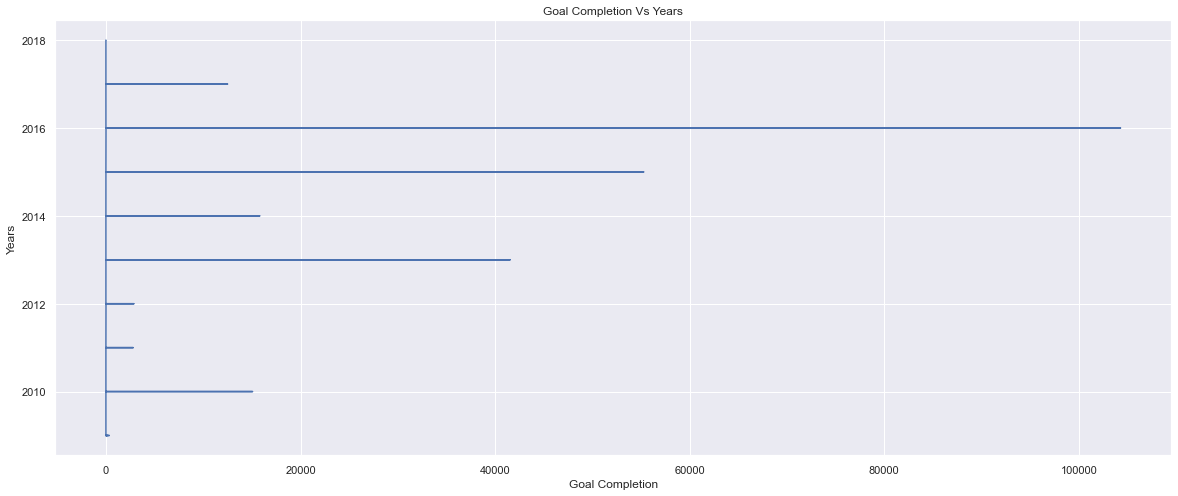

In [36]:
x = df['GoalCompletionPercent']
y = df['Launch_year']
plt.plot(x, y)
plt.xlabel("Goal Completion")  # add X-axis label
plt.ylabel("Years")  # add Y-axis label
plt.title("Goal Completion Vs Years")  # add title
plt.show()

In [37]:
df.drop('GoalCompletionPercent',axis=1,inplace=True)

### From above Graph, we can say that the period after 2013 was certainly a boom for the Kickstarter Projects as Success of get funds increased Expontentially until 2017

### Adding .codes to Categorical value will convert it into int values.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Category            374853 non-null  category
 1   Subcategory         374853 non-null  category
 2   Country             374853 non-null  category
 3   Goal                374853 non-null  int64   
 4   Pledged             374853 non-null  int64   
 5   Backers             374853 non-null  int64   
 6   State               374853 non-null  category
 7   Launch_year         374853 non-null  int64   
 8   Launch_month        374853 non-null  int64   
 9   Launch_day          374853 non-null  int64   
 10  Launch_dayofweek    374853 non-null  int64   
 11  Launch_dayofyear    374853 non-null  int64   
 12  Deadline_year       374853 non-null  int64   
 13  Deadline_month      374853 non-null  int64   
 14  Deadline_day        374853 non-null  int64   
 15  Deadline_dayofwee

In [39]:
#Using sample to show random dataframe
df.sample(10)

,Category,Subcategory,Country,Goal,Pledged,Backers,State,Launch_year,Launch_month,Launch_day,Launch_dayofweek,Launch_dayofyear,Deadline_year,Deadline_month,Deadline_day,Deadline_dayofweek,Deadline_dayofyear
297887,Technology,Technology,Canada,192678,15,2,Failed,2016,7,8,4,190,2016,8,7,6,220
256052,Film & Video,Film & Video,United States,65000,2395,11,Failed,2015,10,29,3,302,2015,12,28,0,362
28027,Comics,Comics,United States,3724,3944,83,Successful,2011,8,21,6,233,2011,9,20,1,263
29914,Film & Video,Film & Video,United States,30000,1857,16,Failed,2011,9,16,4,259,2011,11,15,1,319
315311,Music,Pop,Spain,1,214,8,Successful,2016,11,4,4,309,2016,12,14,2,349
81726,Publishing,Nonfiction,United States,3000,35,1,Failed,2013,1,25,4,25,2013,2,24,6,55
366755,Technology,Wearables,United States,30000,0,0,Failed,2017,10,27,4,300,2017,11,26,6,330
372148,Publishing,Fiction,United States,8000,10,1,Live,2017,12,2,5,336,2018,1,13,5,13
72536,Art,Art,United States,3000,175,7,Failed,2012,10,20,5,294,2012,12,4,1,339
308876,Design,Product Design,United States,35000,325,12,Failed,2016,9,25,6,269,2016,10,26,2,300


In [40]:
#Using Unique() to check uniques values
df['State'].value_counts().keys().unique()

CategoricalIndex(['Failed', 'Successful', 'Canceled', 'Live', 'Suspended'], categories=['Canceled', 'Failed', 'Live', 'Successful', 'Suspended'], ordered=False, dtype='category')

### Except for Successful and Failure, remaining 3 categories of state i.e Calceled, Live, Suspended doesn't add much value to the dataset. Our training model may learn unnecesaary patterns from it. So we drop these 3 categories of State and make our problem a binary classification

In [41]:
df['State'] = df['State'].replace(['Failed','Successful'],[0,1])

In [42]:
df.drop(df.loc[df['State']=='Canceled'].index, inplace=True)
df.drop(df.loc[df['State']=='Live'].index, inplace=True)
df.drop(df.loc[df['State']=='Suspended'].index, inplace=True)

In [43]:
df['State'].value_counts().keys().unique()

Int64Index([0, 1], dtype='int64')

In [44]:
df.head()

,Category,Subcategory,Country,Goal,Pledged,Backers,State,Launch_year,Launch_month,Launch_day,Launch_dayofweek,Launch_dayofyear,Deadline_year,Deadline_month,Deadline_day,Deadline_dayofweek,Deadline_dayofyear
0,Fashion,Fashion,United States,1000,625,30,0,2009,4,21,1,111,2009,5,31,6,151
1,Film & Video,Shorts,United States,80000,22,3,0,2009,4,23,3,113,2009,7,20,0,201
2,Art,Illustration,United States,20,35,3,1,2009,4,24,4,114,2009,5,3,6,123
3,Technology,Software,United States,99,145,25,1,2009,4,25,5,115,2009,7,14,1,195
4,Fashion,Fashion,United States,1900,387,10,0,2009,4,27,0,117,2009,5,26,1,146


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 374605
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Category            331462 non-null  category
 1   Subcategory         331462 non-null  category
 2   Country             331462 non-null  category
 3   Goal                331462 non-null  int64   
 4   Pledged             331462 non-null  int64   
 5   Backers             331462 non-null  int64   
 6   State               331462 non-null  object  
 7   Launch_year         331462 non-null  int64   
 8   Launch_month        331462 non-null  int64   
 9   Launch_day          331462 non-null  int64   
 10  Launch_dayofweek    331462 non-null  int64   
 11  Launch_dayofyear    331462 non-null  int64   
 12  Deadline_year       331462 non-null  int64   
 13  Deadline_month      331462 non-null  int64   
 14  Deadline_day        331462 non-null  int64   
 15  Deadline_dayofwee

### We need to Convert Category to to Codes so that models can learn patterns from it.

In [46]:
#Let's check which all columns have object type
string_columns = []
for column,content in df.items():
    if pd.api.types.is_string_dtype(content):
        string_columns.append(column)
print(string_columns)

['State']


In [47]:
pd.Categorical(df["Country"]).codes+1, pd.Categorical(df["Country"]).codes

(array([22, 22, 22, ..., 22, 22,  1], dtype=int8),
 array([21, 21, 21, ..., 21, 21,  0], dtype=int8))

In [48]:
#Let's convert all above columns into categorical
for column,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[column]= content.astype('category').cat.as_ordered()# category as ascending
                                                #use .as_ordered if you want to sort inside values else .categorical
                                                #.cat is same like .dt used before for datetime

In [49]:
#Turn categorical variables(objects) into numbers as well as fill missing values
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1 # +1 because if null value found, .codes returns -1. 
                                                        # by adding +1 to -1 = 0

In [50]:
df.head()

,Category,Subcategory,Country,Goal,Pledged,Backers,State,Launch_year,Launch_month,Launch_day,Launch_dayofweek,Launch_dayofyear,Deadline_year,Deadline_month,Deadline_day,Deadline_dayofweek,Deadline_dayofyear
0,6,53,22,1000,625,30,1,2009,4,21,1,111,2009,5,31,6,151
1,7,130,22,80000,22,3,1,2009,4,23,3,113,2009,7,20,0,201
2,1,71,22,20,35,3,2,2009,4,24,4,114,2009,5,3,6,123
3,14,132,22,99,145,25,2,2009,4,25,5,115,2009,7,14,1,195
4,6,53,22,1900,387,10,1,2009,4,27,0,117,2009,5,26,1,146


In [51]:
df["State"].value_counts()

1    197611
2    133851
Name: State, dtype: int64

In [52]:
#Changing State value to original state
df['State'].replace([1,2],[0,1], inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 374605
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Category            331462 non-null  int8 
 1   Subcategory         331462 non-null  int16
 2   Country             331462 non-null  int8 
 3   Goal                331462 non-null  int64
 4   Pledged             331462 non-null  int64
 5   Backers             331462 non-null  int64
 6   State               331462 non-null  int64
 7   Launch_year         331462 non-null  int64
 8   Launch_month        331462 non-null  int64
 9   Launch_day          331462 non-null  int64
 10  Launch_dayofweek    331462 non-null  int64
 11  Launch_dayofyear    331462 non-null  int64
 12  Deadline_year       331462 non-null  int64
 13  Deadline_month      331462 non-null  int64
 14  Deadline_day        331462 non-null  int64
 15  Deadline_dayofweek  331462 non-null  int64
 16  Deadline_dayofyear  

In [54]:
df.head()

,Category,Subcategory,Country,Goal,Pledged,Backers,State,Launch_year,Launch_month,Launch_day,Launch_dayofweek,Launch_dayofyear,Deadline_year,Deadline_month,Deadline_day,Deadline_dayofweek,Deadline_dayofyear
0,6,53,22,1000,625,30,0,2009,4,21,1,111,2009,5,31,6,151
1,7,130,22,80000,22,3,0,2009,4,23,3,113,2009,7,20,0,201
2,1,71,22,20,35,3,1,2009,4,24,4,114,2009,5,3,6,123
3,14,132,22,99,145,25,1,2009,4,25,5,115,2009,7,14,1,195
4,6,53,22,1900,387,10,0,2009,4,27,0,117,2009,5,26,1,146


##Now that all our columns are converted into int or float, we can start preparing the model. We'll start by plotting a correlation plot between different values

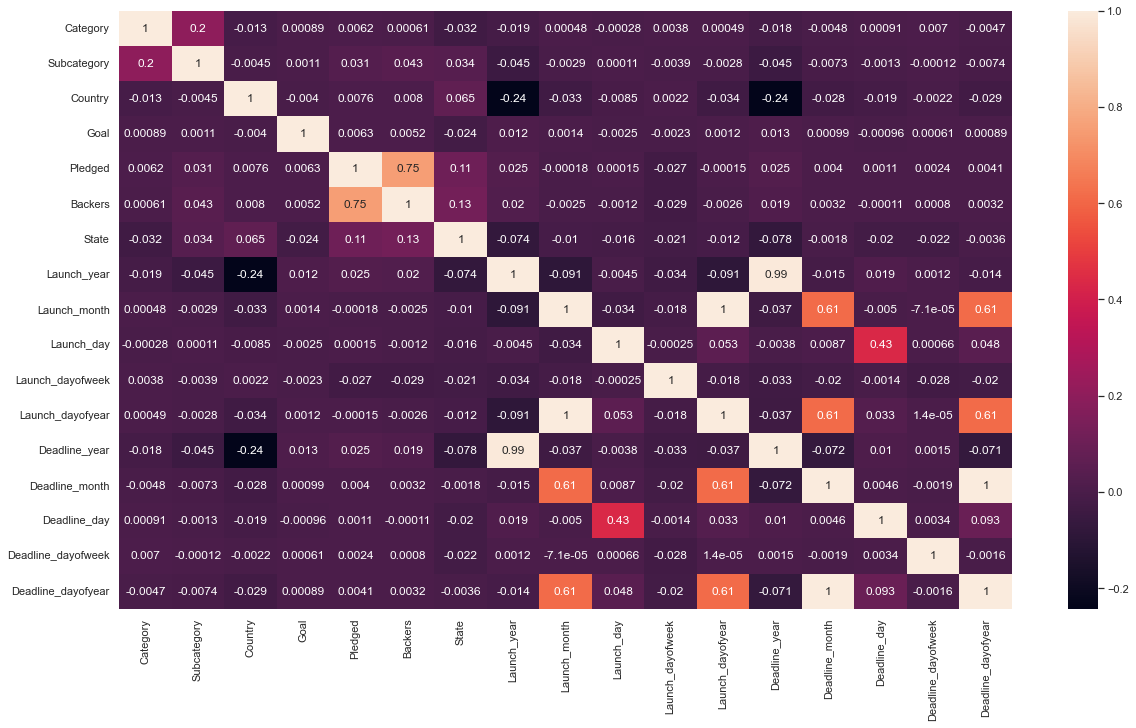

In [55]:
#using heat map corr() for heat map using Object Oriented method of plotting
fig, ax = plt.subplots(figsize=(20,11))
ax = sns.heatmap(df.corr(),annot=True)# can also add linewidths = 1,fmt = ".2f",cmap='YlGnBu'

# Let's Start Modelling by using various SciKit Learn Libraries

In [56]:
#Modelling
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve, roc_curve

In [57]:
#We'll predict the state
np.random.seed(42)
X  = df.drop('State',axis=1)
y = df['State']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Now that we got our data split into train and test, we'll find patterns on train set and use patterns in test set
We will try 3 different ML model

    1.Logistics Regression
    2.K-Nearnest Neighbour Classifier
    3.Random Forest Classifier
    4.Gaussian Naive Bayes



In [58]:
models = {
        "Logistics_Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(), 
        "Random_Forest":RandomForestClassifier(),
        "Naive Bayes": GaussianNB()
         }


In [59]:
#Creating a function to fit and score the model
def fit_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    models_scores={} # model_name: its_score
    #looping
    for name, modelll in models.items():
        modelll.fit(X_train,y_train)
        models_scores[name] = modelll.score(X_test,y_test)
    return models_scores

In [60]:
model_scores = fit_score(models,X_train,X_test,y_train,y_test)
model_scores

C:\Users\acer\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistics_Regression': 0.9990496734195163,
 'KNN': 0.9986725596971022,
 'Random_Forest': 0.9969076674762041,
 'Naive Bayes': 0.7066809467062888}

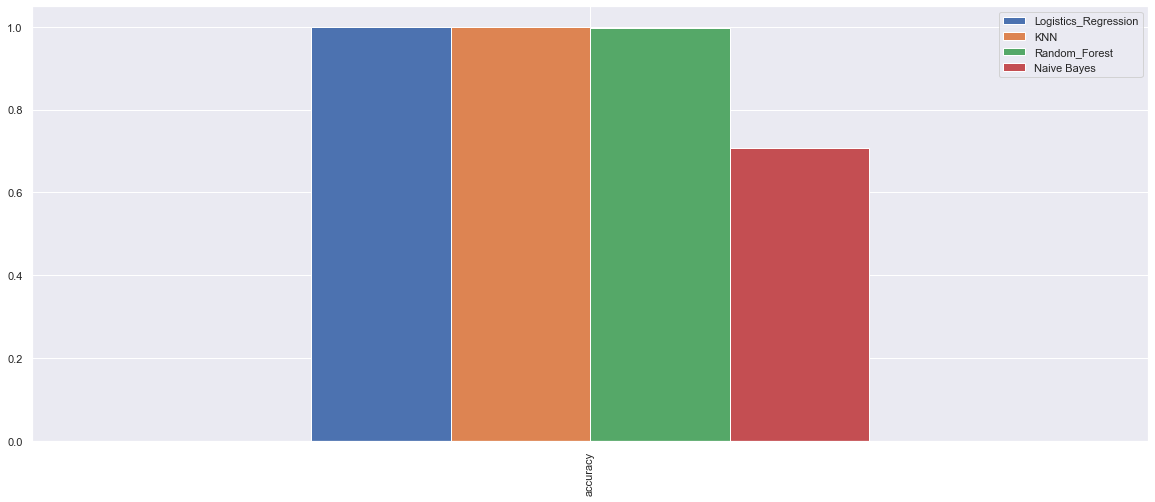

In [61]:
pd.DataFrame(model_scores,index=['accuracy']).plot(kind='bar');

### Now we have a baseline models accuracy and we know which model works best for our dataset. 

Let's look at the following aspects of Modelling:

    1.Hyperparameter Tuning
    2.Feature importance 
    3.Confusion Matrix
    4.Cross-Validation
    5.Precision
    6.Recall
    7.F1 Score
    8.Classification report
    9.ROC curve
    10.Area under the curve


## 1.Hyperparameter Tuning by Hand followed by Randomized Search CV and Grid Search CV

Using K-Nearest Neighbour model:

In [62]:
# train_scores = []
# test_scores = []
# # create a list of different values for n_neighbours
# neighbors = range(8,40,5)
# #setup KNN instance
# knn = KNeighborsClassifier()
# #loop through different n_neighbours
# for i in neighbors:
#     knn.set_params(n_neighbors=i)
#     # fit the algorithm
#     knn.fit(X_train,y_train)
#     # update the training scores list
#     train_scores.append(knn.score(X_train,y_train))
#     #update the test score list
#     test_scores.append(knn.score(X_test,y_test))

#### Now plotting to find the elbow

In [63]:
# plt.plot(neighbors,train_scores,label="Train Scores")
# plt.plot(neighbors,test_scores,label="Test Scores")
# plt.xlabel("No of neighbors")
# plt.ylabel("Model Scores")
# plt.legend()
# plt.xticks(np.arange(1,21,1))
# print(f"Max KNN score on test data:{max(test_scores)*100:.2f}%")

### We won't we using KNN or Gaussian model as Logistics Regression has the best accuracy in all the models

## Hyperparameters Tuning with RandomizedSearchCV

We're going to tune :

    LogisticsRegression()
    RandomForestClassifier()

###Setting the grid for Logistics Regression  and Random Forest Model

In [64]:
lr = {'C':np.logspace(-4,4,20), 
      'solver':['liblinear']
      }


rfc = {
        'n_estimators':np.arange(10,1000,50),
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 2),
        "min_samples_leaf": np.arange(1, 20, 2)}

### Using RandomizedSearchCV with our Tuned Hyperparameters

For logistics regression

In [155]:
np.random.seed(42)
rs_lr = RandomizedSearchCV(LogisticRegression(),lr,cv=5,n_iter=20,verbose=True)
rs_lr.fit(X_train, y_train)
print(f" Best Parameters are :{rs_lr.best_params_}")
rs_lr.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Best Parameters are :{'solver': 'liblinear', 'C': 0.0018329807108324356}


0.9979485013500671

#### Best Parameters using Randomized Search CV for Logistics Reression are:{'solver': 'liblinear', 'C': 0.0018329807108324356} Score on Test data is 0.9979485013500671

#### For Random Forest Classifier

In [156]:
# np.random.seed(42)
# rs_rfc = RandomizedSearchCV(RandomForestClassifier(),rfc,cv=5,n_iter=20,verbose=True)
# rs_rfc.fit(X_train,y_train)
# print(f" Best Parameters are :{rs_rfc.best_params_}")
# rs_rfc.score(X_test,y_test)

#### Best Parametersusing Randomized Search CV for Random Forest Classifier are :{'n_estimators': 510, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_depth': None} Score on Test data is 0.9949768452174438

### Hyperparameter Tuning using GridSearchCV

Since our Random Forest Classifier model provides the best score so far, we'll try and improve them again using GridSearchCV

Preparing grid for both models


In [65]:
lr = {'C':np.logspace(-4,4,20), 
      'solver':['liblinear']
      }

rfc = {
        'n_estimators':np.arange(10,1000,50),
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 2),
        "min_samples_leaf": np.arange(1, 20, 2)
        }


### For Logistics Regression

In [66]:
gs_lr = GridSearchCV(LogisticRegression(),lr,cv=5,verbose=True)
gs_lr.fit(X_train,y_train)
print(f" Best Parameters are :{gs_lr.best_params_}")
gs_lr.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Best Parameters are :{'C': 0.0018329807108324356, 'solver': 'liblinear'}


0.9979485013500671

### Best Parameters for Logistics Regression using Grid Search CV are :{'C': 0.0018329807108324356, 'solver': 'liblinear'} Score on Test data is 0.9979485013500671

### For Random Forest Classifier 

In [67]:
# gs_rfc = GridSearchCV(RandomForestClassifier(),rfc,cv=5,verbose=True)
# gs_rfc.fit(X_train,y_train)
# print(f" Best Parameters are :{gs_rfc.best_params_}")
# gs_rfc.score(X_test,y_test)

### We'll use Logistics Regression for further evaluation 

## Evaluating our tuned ML classifier, beyond Accuracy using the following:

    1.ROC curve and AUC curve
    2.Confusion matrix
    3.Classification Report
    4.Precision
    5.Recall
    6.F1 Score

To make comparisons and evaluate our trained model, 1st we need to make prediction


In [68]:
#make prediction with tuned model using Randomized Search CV Random Forest Classification 
y_preds = gs_lr.predict(X_test)
y_preds

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [69]:
# Predict_proba gives us confidence level i.e how well model is able to predict 
y_preds_proba = gs_lr.predict_proba(X_test)
y_preds_proba_positive = y_preds_proba[:,1]
y_preds_proba_positive

array([2.18225192e-195, 9.99821422e-001, 3.27026189e-141, ...,
       1.37070982e-010, 1.00000000e+000, 4.43140135e-270])

In [70]:
y_preds_proba = gs_lr.predict_proba(X_test)
y_preds_proba[:5]
# Predict Proba states that for the 1st value, it is 99% confident that it's a failure and 24% confident that it is a success

array([[1.00000000e+000, 2.18225192e-195],
       [1.78578363e-004, 9.99821422e-001],
       [1.00000000e+000, 3.27026189e-141],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 3.31508854e-282]])

## Calculating False Positive Rate, True Positive Rate, Thresholds

In [71]:
y_test_arr = np.array(y_test)
y_test_arr

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [72]:
y_preds_proba_positive

array([2.18225192e-195, 9.99821422e-001, 3.27026189e-141, ...,
       1.37070982e-010, 1.00000000e+000, 4.43140135e-270])

In [73]:
fpr, tpr,thresholds = roc_curve(y_test_arr, y_preds_proba_positive)

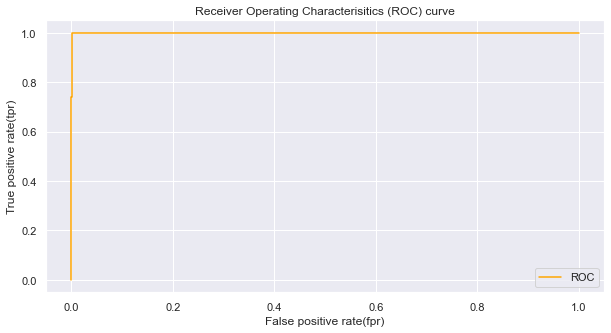

In [74]:
# create a fn for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curves(fpr,tpr):
    """
    Plots a ROC curve given  the false positive rate(fpr)
    and true positive rate(tpr) of a model. 
    """
    # Plot a curve
    plt.figure(figsize=(10,5))
    plt.plot(fpr,tpr,color="orange",label ="ROC")
    # Plot line with no predictive power(baseline)
    #plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing") # uncomment later
    # Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characterisitics (ROC) curve")
    plt.legend()
    plt.show()
   
plot_roc_curves(fpr,tpr)

C:\Users\acer\Desktop\sample_project_1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


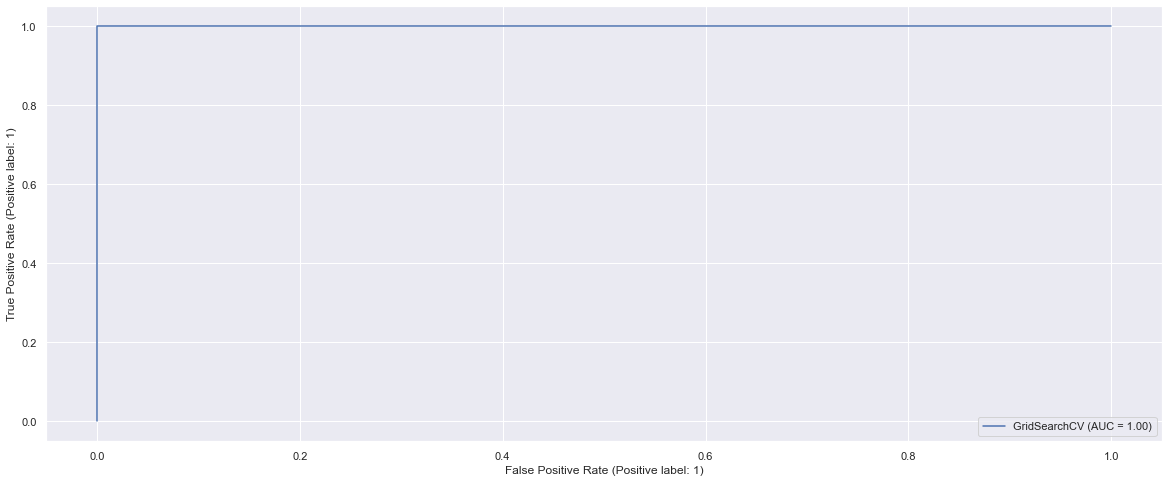

In [75]:
## Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_lr,X_test,y_test);

In [76]:
#Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[39373   136]
 [    0 26784]]


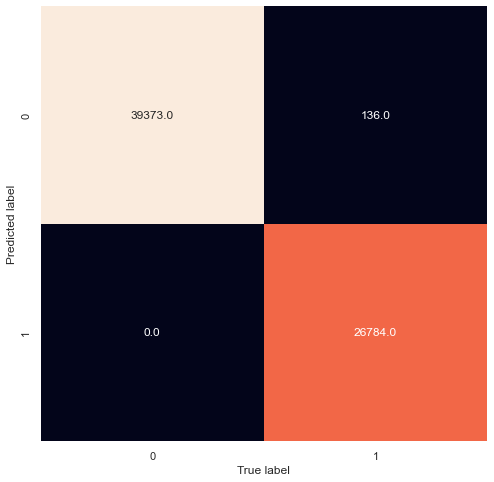

In [77]:
#plotting a nice looking confusion_matrix using seaborn
def plot_conf_mat(y_test,y_preds):
    fig, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False,fmt=".1f")
    plt.xlabel("True label")
    plt.ylabel('Predicted label')
plot_conf_mat(y_test,y_preds)

### We have ROC curve, AUC metric and confusion matrix,  let's get a classification report as well as Cross validated Precision,recall, f1 score

In [78]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39509
           1       0.99      1.00      1.00     26784

    accuracy                           1.00     66293
   macro avg       1.00      1.00      1.00     66293
weighted avg       1.00      1.00      1.00     66293



# Calculate evaluation metrics using CV

We're going to calculate accuracy,precision, recall, f1 score of our model using CV and to do so we'll be using cross_val_score


In [79]:
clf = LogisticRegression(C=0.0018329807108324356, solver='liblinear')

In [80]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
np.mean(cv_acc)

0.9974416400279082

In [81]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9937328327615852

In [82]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9999925289503174

In [83]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.996847599076238

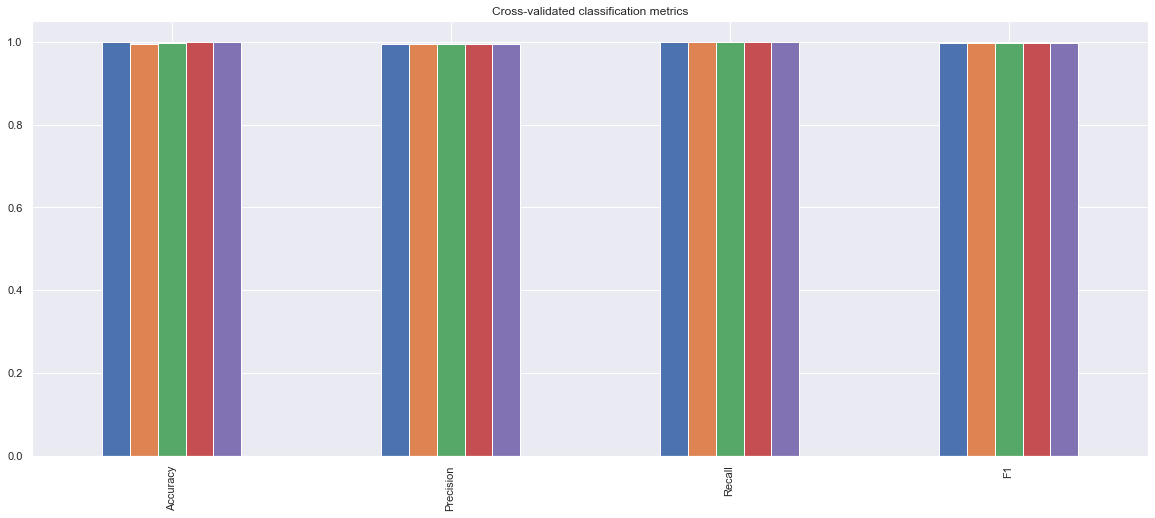

In [84]:
#Visualize the above 4 metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1})# try adding index ie index[0,1,2,3]
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

<AxesSubplot:>

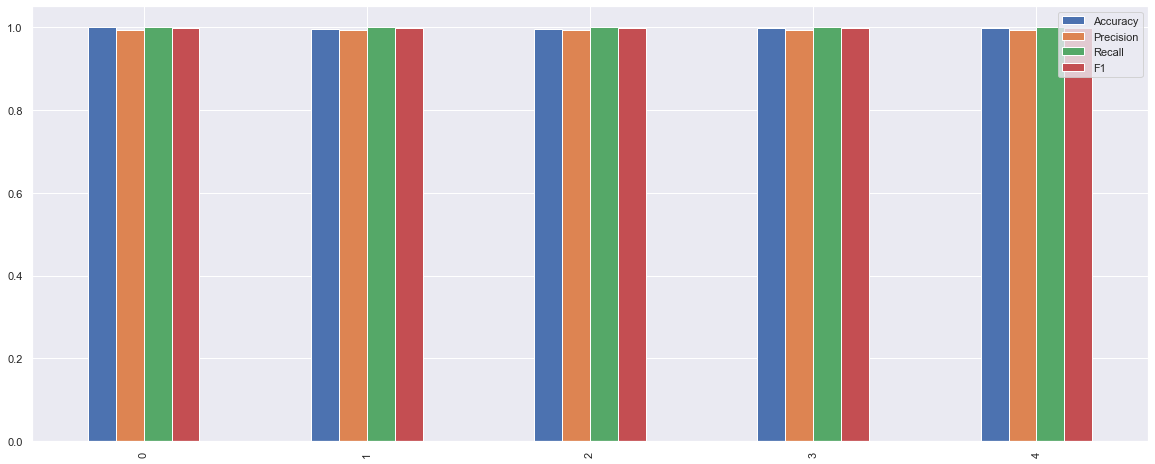

In [85]:
cv_metrics.plot(kind='bar')

# Feature Importance-

Feature importance is asking- which features contributed most to the outcomes of the model and their contribution

Finding Feature Importance is different for each ML model. One way to find feature importance is to search for (Model Name)feature importance

Let's find out feature importance for our Logistics Regression Model..


In [86]:
# Fit an instance of LogisticsRegresison
gs_lr.best_params_ #just to get C and solver value
clf = LogisticRegression(C=0.0018329807108324356, solver='liblinear')
clf.fit(X_train,y_train);

In [87]:
#check coeff
clf.coef_[0]

array([ 8.56901220e-04,  3.62495451e-03,  2.11750242e-03, -6.49675343e-02,
        6.56149169e-02,  1.23421904e-02,  4.14539316e-04, -8.26913848e-05,
        1.25535277e-03,  2.98718864e-04, -8.79373271e-04,  4.13265083e-04,
       -7.02334680e-05,  5.90185513e-04, -1.95082310e-04, -1.43157433e-03])

In [88]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Category': 0.0008569012198396534,
 'Subcategory': 0.0036249545058912153,
 'Country': 0.0021175024178140375,
 'Goal': -0.064967534308704,
 'Pledged': 0.06561491693596899,
 'Backers': 0.012342190360043342,
 'State': 0.0004145393162137843,
 'Launch_year': -8.269138476060825e-05,
 'Launch_month': 0.0012553527669263798,
 'Launch_day': 0.00029871886402973985,
 'Launch_dayofweek': -0.0008793732705416465,
 'Launch_dayofyear': 0.0004132650825144633,
 'Deadline_year': -7.023346797255757e-05,
 'Deadline_month': 0.0005901855131787482,
 'Deadline_day': -0.00019508230977103322,
 'Deadline_dayofweek': -0.0014315743252019965}

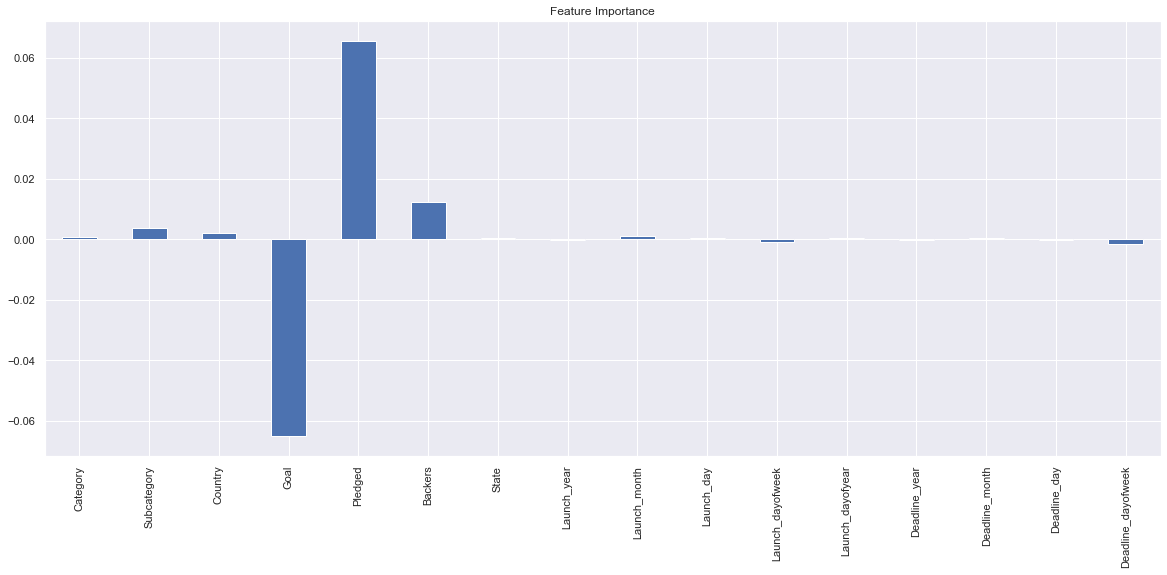

In [89]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

# Let's Find the Answers for the below questions with the help of Power BI to get better insights from the data-PDF 

## 1.Which category has the highest success percentage? How many projects have been successful?

In [91]:
# Success for a Kickstarter Project is when the Pledged Amount exceeds Goal Amount which certainly tells that 
#investors are confident about certain projects. Such top 3 category of Projects include Film&Video, Games, Technology

## 2.What project with a goal over 1,000 USD, had the biggest Goal Completion % (Pledged / Goal)? How much money was pledged?

In [92]:
#Project of goal over $1000 USD which had biggest Goal Completion and a good Pledged/Goal Ratio is 
#Product Design SubCategory

## 3.Can we identify any trends in project success rates over the years?

In [ ]:
#We can certainly say that there was a boom after 2014 and reached its zenith in 2015 for Successful Projects

## 4.As an investor, what types of projects should you be looking at to guarantee future success?

In [93]:
#As an investor, I would certainly want to invest in projects which have high rate of success. 
#Such projects which have given fruitful results are Games, Design,Technology,Film&Videos